# 1 - Importação das Bilbiotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from efficient_apriori import apriori
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2 - Importação dos dados

In [3]:
uri = 'data/hanseniase_v1.csv'
database = pd.read_csv(uri, sep=',', low_memory=False)
menores_15 = database[database['NU_IDADE_N'] < 15]

## 3 - Preparação da base de dados para mineração de dados

Nesta etapa estamos selecionando apenas os atributos necessários e convertendo a base de dados  para o formato market basket de maneira que o algoritmo de mineração Apriori possa carregar o conjunto de dados.

In [3]:
variables = [
    'CS_SEXO',
    'CS_RACA',
    'CS_ESCOL_N',
    'FAIXA_IDADE',
    'CS_ZONA',
    'AVALIA_N',
    'CLASSOPERA'
]
database = database[variables]
market_basket_transactions = [tuple(item) for index, item in database.iterrows()]

menores_15 = menores_15[variables]

## Geração das regras de associação

Nesta etapa escolheremos o algoritmo Apriori para a geração das regras de associação, com a base de dados transformada em um formato que o mesmo possa interpretar poderemos utilizá-lo. Após isso devemos configurar os parâmetros para a geração das regras de associação. Aqui, faremos a manutenção manual do **suporte** e da confiança mínima. No parâmetro de suporte utilizaremos como valor de 0.2 (20%) e como **confiança mínima** de 0.5 (50%).

In [25]:
min_support = 0.2
min_confidence = 0.6
itemsets, rules = apriori(
    market_basket_transactions, 
    min_support=min_support, 
    min_confidence=min_confidence
)

## Informação da geração das regras de associação

In [26]:
itemsets_length = len(itemsets)
rules_length = len(sorted(rules, key=lambda x: x.confidence))
print("Rules length {} \nitemsets length {}" .format(rules_length, itemsets_length))

Rules length 58 
itemsets length 3


## Visualização das regras de associação

A visualização inicial das regras de associação se dá através da observação das regras geradas sendo o primeiro como o antecedente da regra e o segundo como o consequente. No lado direito há as métricas utilizadas de suporte, confiança e outros.

In [27]:
my_rules = []
my_confs = []
my_support = []
my_lift = []
output = []
for r in sorted(rules, key=lambda x: (x.confidence, x.support), reverse=True):
    print(r)
    rule = str(r).split(' (')[0]
    my_rules.append(rule)
    my_confs.append(r.confidence)
    my_support.append(r.support)
    my_lift.append(r.lift)
    antecedent, consequente = str(r).split(' (')[0].split(' -> ')
    output.append({
        "A": antecedent,
        "B": consequente,
        "CONF": "{}%" .format(round(100 * r.confidence,2), '.2f'),
        "SUP": "{}%" .format(round(100 * r.support,2),'.2f')
    })
rules_length = len(rules)

{Feminino, Paucibacilar} -> {Urbana} (conf: 0.881, supp: 0.214, lift: 1.041, conv: 1.293)
{Feminino, Grau 0} -> {Urbana} (conf: 0.875, supp: 0.241, lift: 1.034, conv: 1.229)
{Grau 0, Paucibacilar} -> {Urbana} (conf: 0.874, supp: 0.309, lift: 1.032, conv: 1.217)
{Feminino, Parda} -> {Urbana} (conf: 0.872, supp: 0.229, lift: 1.030, conv: 1.201)
{Feminino} -> {Urbana} (conf: 0.870, supp: 0.368, lift: 1.028, conv: 1.185)
{Paucibacilar} -> {Urbana} (conf: 0.865, supp: 0.407, lift: 1.022, conv: 1.135)
{Parda, Paucibacilar} -> {Urbana} (conf: 0.864, supp: 0.256, lift: 1.020, conv: 1.126)
{Grau 0} -> {Urbana} (conf: 0.857, supp: 0.523, lift: 1.013, conv: 1.077)
{Grau 0, Parda} -> {Urbana} (conf: 0.855, supp: 0.324, lift: 1.010, conv: 1.059)
{Parda} -> {Urbana} (conf: 0.846, supp: 0.528, lift: 1.000, conv: 0.998)
{Grau 0, Masculino} -> {Urbana} (conf: 0.843, supp: 0.282, lift: 0.996, conv: 0.977)
{Ensino Fundamental Incompleto, Paucibacilar} -> {Urbana} (conf: 0.837, supp: 0.215, lift: 0.989, c

In [92]:
output_df = pd.DataFrame(data=output)

output_df.to_csv('output.csv')

[]

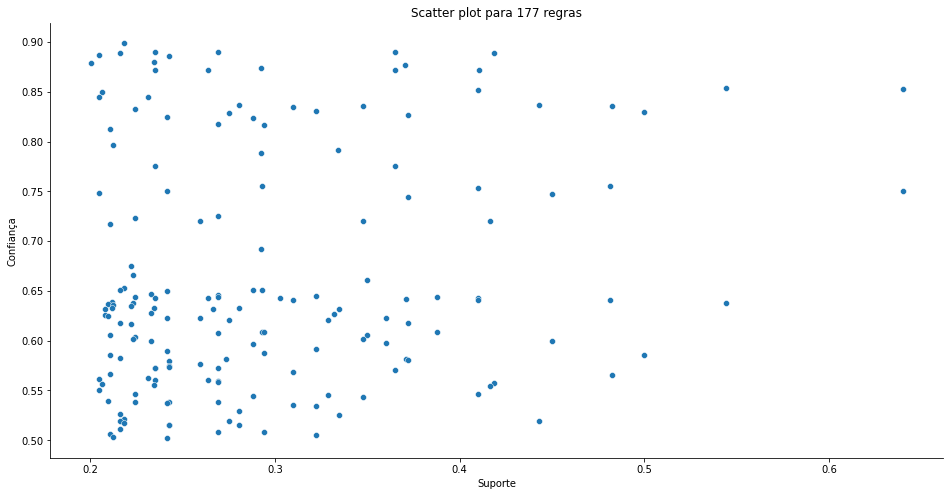

In [46]:
data = pd.DataFrame({
    'rules': my_rules,
    'confidence': my_confs,
    'support': my_support,
    'lift': my_lift,
})
plt.figure(figsize=(16,8))
ax = sns.scatterplot(data=data, x="support", y="confidence")
sns.despine()
ax.plot()

## Geração das regras de associação para menores de 15 anos